In [1]:
import sys
!{sys.executable} -m pip install pycbc ligo-common --no-cache-dir

In [2]:
%matplotlib inline

#import what is needed

from pycbc.waveform import get_td_waveform
import pylab
from matplotlib import pyplot as plt

#code for producing these waveforms was found here: 

m=1.36                                                       # masses are the same (1.36 waveforms)
d=300                                                        #300 tidal deformation for both waveforms
hp, hc = get_td_waveform(approximant="IMRPhenomD_NRTidalv2", #no tidal deformation
                                 mass1=m,                      #these parameters are the same here as they are for the 
                                 mass2=m,                      #second waveform except for tidal deformation. 
                                 f_lower=30,
                                 delta_t=1.0/163856,
                                 distance=40,
                                 inclination=149)
sp, sc = get_td_waveform(approximant="IMRPhenomD_NRTidalv2",   #tidal deformation
                                 lambda1=d,                    #tidal deformation of star 1
                                 lambda2=d,                    #tidal deformation of star 2
                                 mass1=m,                      #masses are assumed same here
                                 mass2=m,                      
                                 f_lower=30,                   #frequency cutoff
                                 delta_t=1.0/163856,           #high rate for detailed graph
                                 coa_phase=27,                 #this value is to overlap the waves to more clearly show the effect
                                 distance=40,
                                 inclination=149)

/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/pycbc/population/fgmc_functions.py:21: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  use('Agg')


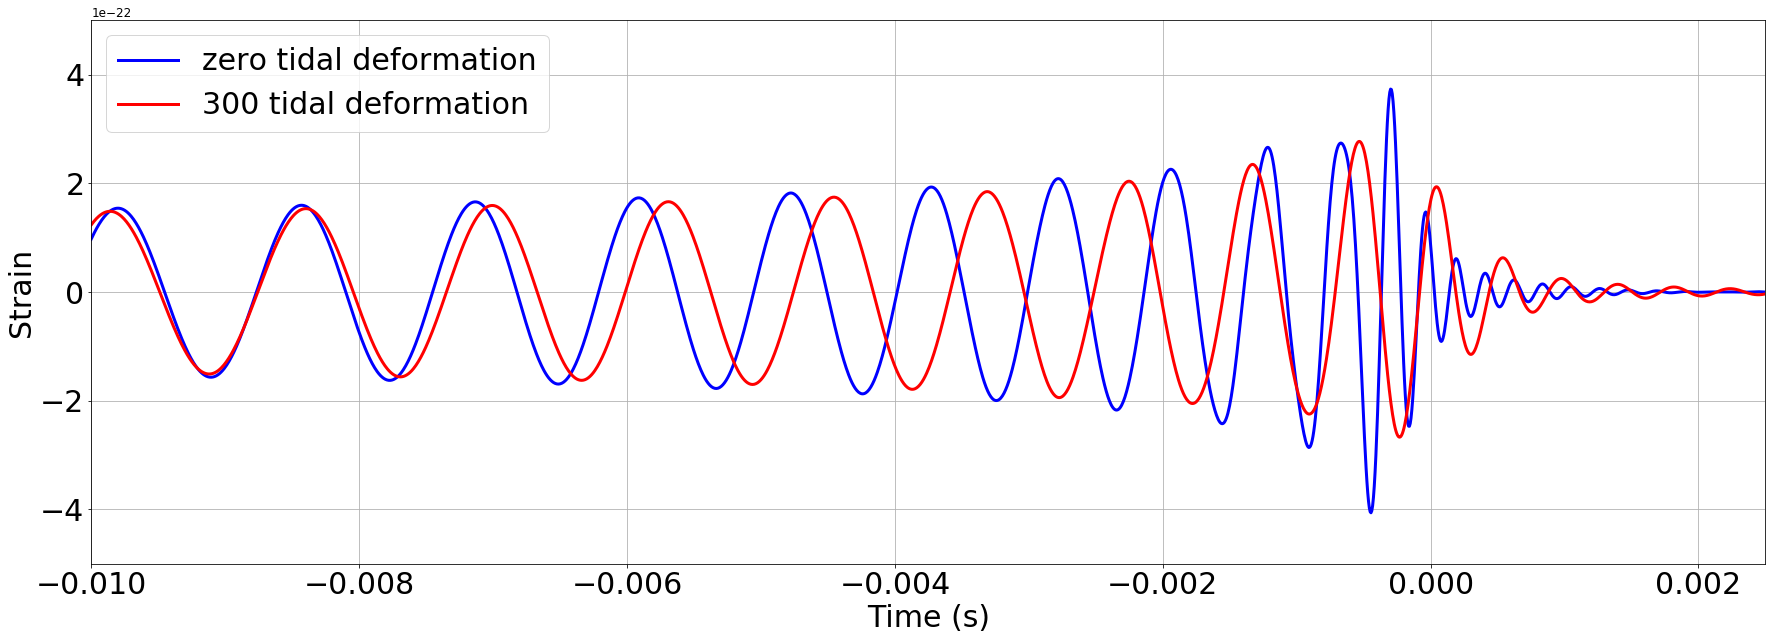

In [3]:
pylab.figure(figsize=[30, 10])          #set figure size
pylab.plot(hp.sample_times, hp, label='zero tidal deformation', linewidth=3,color='blue')        #plot a zero deformation waveform
pylab.plot(sp.sample_times+0.0027, sp, label='300 tidal deformation', linewidth=3,color='red')   #plot a waveform 300
pylab.xlabel('Time (s)',fontsize=30)    #set x label 
pylab.ylabel('Strain',fontsize=30)      #set y label
plt.xticks(fontsize = 30)               #set y axis font
plt.yticks(fontsize = 30)               #set x axis font

pylab.xlim(-0.01,0.0025)                # limit x for better view of merger
pylab.ylim(-5e-22,5e-22)                # limit y because y not
pylab.legend(prop={'size': 30})      
pylab.grid()                           
pylab.show()                            # show the plot

In [ ]:
from scipy.stats import spearmanr

ET=['MS1', 'MS1B_PP', 'H4', 'SKI3', 'H2', 'SKI2', 'ALF2', 'BGN1H1', 'H6', 'H5', 'SK272', 'RS', 'SK255', 'GS2', 'SQM2', 'H1', 'H7', 'BSK21', 'QMC700', 'MPA1', 'SKI6', 'SKMP', 'SKB', 'SKI4', 'SLY9', 'AP1', 'ENG', 'AP3', 'ALF1', 'SKOP', 'AP2', 'ALF3', 'PAL6', 'SLY230A', 'PCL2', 'BPAL12', 'BSK20', 'WFF1', 'SLY4', 'SLY', 'SLY2', 'ALF4', 'BSK19', 'FPS', 'KDE0V', 'KDE0V1', 'WFF3', 'AP4', 'HQC18', 'BBB2', 'APR', 'BHF_BBB2', 'APR4_EPP', 'MS2', 'WFF2']
LIGO = ['MS1', 'HQC18', 'MS1B_PP', 'H4', 'SKI3', 'SKI2', 'H2', 'ALF2', 'BGN1H1', 'H6', 'H5', 'SK272', 'RS', 'SK255', 'GS2', 'SQM2', 'H1', 'H7', 'BSK21', 'QMC700', 'MPA1', 'SKI6', 'SKMP', 'SKB', 'SKI4', 'SLY9', 'ENG', 'AP3', 'AP1', 'SKOP', 'ALF1', 'AP2', 'SLY230A', 'PCL2', 'ALF3', 'BSK20', 'SLY', 'SLY4', 'SLY2', 'PAL6', 'ALF4', 'BPAL12', 'WFF1', 'KDE0V', 'KDE0V1', 'BSK19', 'AP4', 'BBB2', 'FPS', 'APR', 'APR4_EPP', 'WFF2', 'WFF3', 'BHF_BBB2', 'MS2']
rho = spearmanr(ET, LIGO)
print(rho)